### Imports

In [66]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.rc('font',family='AppleGothic')
import warnings
warnings.filterwarnings(action='ignore')

df_raw=pd.read_csv('../data/raw_data/train.csv')
df=df_raw.copy()

sample_submission_raw=pd.read_csv('../data/raw_data/sample_submission.csv')
sample_submission=sample_submission_raw.copy()

In [67]:
# https://data.seoul.go.kr/dataList/10672/S/2/datasetView.do;jsessionid=100BAB41411B3F3B93C6B20BEFE9AB56.new_portal-svr-11

rain_data = pd.read_csv('rains.csv',header=0).transpose()
rain_data=rain_data[rain_data[0] == '강수일수 (일)'][120:]

rain_data=rain_data.iloc[:-12,:]

rain_data=rain_data.drop(0,axis=1).rename(columns={1:'강수일수'})
rain_data.index=pd.to_datetime(rain_data.index,format='%Y. %m.%d' )

rain_data['year']=rain_data.index.year
rain_data['month']=rain_data.index.month

rain_data['강수일수']=pd.to_numeric(rain_data['강수일수'])

### Preprocessing

In [68]:
df['일시']=pd.to_datetime(df['일시'],format="%Y%m%d")
df.set_index('일시',inplace=True)

df['일'] = df.index.day
df['월'] = df.index.month
df['년'] = df.index.year
df['요일']=df.index.day_of_week
df['주']=df.index.week

df['주말평일'] = df['요일'].apply(lambda x: '평일' if x < 5 else '주말')

# --

sample_submission['일시']=pd.to_datetime(sample_submission['일시'],format="%Y%m%d")
sample_submission.set_index('일시',inplace=True)

sample_submission['일'] = sample_submission.index.day
sample_submission['월'] = sample_submission.index.month
sample_submission['년'] = sample_submission.index.year
sample_submission['요일']=sample_submission.index.day_of_week
sample_submission['주']=sample_submission.index.week

sample_submission['주말평일'] = sample_submission['요일'].apply(lambda x: '평일' if x < 5 else '주말')

In [69]:
from pytimekr import pytimekr
def get_holiday(_year):
    holidays=[]
    for holiday in pytimekr.holidays(year=_year):
        if pytimekr.red_days(holiday) != None:
            ans = [i.strftime("%Y-%m-%d") for i in pytimekr.red_days(holiday)]
            holidays.extend(ans)
        else:
            ans=holiday.strftime("%Y-%m-%d")
            holidays.append(ans)
    return list(set(holidays))

In [70]:
df.loc[get_holiday(2018),'주말평일'] = '주말'
df.loc[get_holiday(2019),'주말평일'] = '주말'
df.loc[get_holiday(2020),'주말평일'] = '주말'
df.loc[get_holiday(2021),'주말평일'] = '주말'
sample_submission.loc[sorted(get_holiday(2022))[:-1],'주말평일'] ='주말'

In [71]:
df_2018_raw = df[df.index.year == 2018]
df_2019_raw = df[df.index.year == 2019]
df_2020_raw = df[df.index.year == 2020]
df_2021_raw = df[df.index.year == 2021]

<AxesSubplot: xlabel='주'>

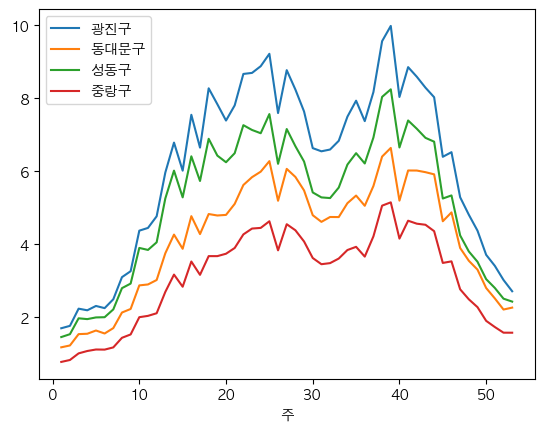

In [75]:
df.groupby('주')[df.columns[:4]].mean().plot()

In [64]:
# remove rain
train_data = df.copy()
test_data = sample_submission.copy()

df_2018 = train_data[train_data.index.year == 2018]
df_2019 = train_data[train_data.index.year == 2019]
df_2020 = train_data[train_data.index.year == 2020]
df_2021 = train_data[train_data.index.year == 2021]

for months,rain in zip(range(1,13),rain_data[rain_data['year']==2018]['강수일수'].values):
    temp=df_2018[df_2018['월'].isin([months])]
    for location in ['광진구','동대문구','성동구','중랑구']:
        temp.loc[temp[temp['월'].isin([months])][location].nsmallest(rain).index,location] = np.NaN
        temp[location]=temp[location].fillna(df_2020.groupby('주')[location].mean())
    df_2018[df_2018['월'].isin([months])] = temp

for months,rain in zip(range(1,13),rain_data[rain_data['year']==2019]['강수일수'].values):
    temp=df_2019[df_2019['월'].isin([months])]
    for location in ['광진구','동대문구','성동구','중랑구']:
        temp.loc[temp[temp['월'].isin([months])][location].nsmallest(rain).index,location] = np.NaN
        temp[location]=temp[location].fillna(df_2020.groupby('주')[location].mean())
    df_2019[df_2019['월'].isin([months])] = temp

for months,rain in zip(range(1,13),rain_data[rain_data['year']==2020]['강수일수'].values):
    temp=df_2020[df_2020['월'].isin([months])]
    for location in ['광진구','동대문구','성동구','중랑구']:
        temp.loc[temp[temp['월'].isin([months])][location].nsmallest(rain).index,location] = np.NaN
        temp[location]=temp[location].fillna(df_2020.groupby('주')[location].mean())
    df_2020[df_2020['월'].isin([months])] = temp

for months,rain in zip(range(1,13),rain_data[rain_data['year']==2021]['강수일수'].values):
    temp=df_2021[df_2021['월'].isin([months])]
    for location in ['광진구','동대문구','성동구','중랑구']:
        temp.loc[temp[temp['월'].isin([months])][location].nsmallest(rain).index,location] = np.NaN
        temp[location]=temp[location].fillna(df_2020.groupby('주')[location].mean())
    df_2021[df_2021['월'].isin([months])] = temp

train_data[train_data.index.year == 2018] = df_2018
train_data[train_data.index.year == 2019] = df_2019
train_data[train_data.index.year == 2020] = df_2020
train_data[train_data.index.year == 2021] = df_2021

In [7]:
# remove rain
train_data = df.copy()
test_data = sample_submission.copy()

df_2018 = train_data[train_data.index.year == 2018]
df_2019 = train_data[train_data.index.year == 2019]
df_2020 = train_data[train_data.index.year == 2020]
df_2021 = train_data[train_data.index.year == 2021]

for months,rain in zip(range(1,13),rain_data[rain_data['year']==2018]['강수일수'].values):
    temp=df_2018[df_2018['월'].isin([months])]
    for location in ['광진구','동대문구','성동구','중랑구']:
        temp.loc[temp[temp['월'].isin([months])][location].nsmallest(rain).index,location] = np.NaN
        temp[location]=temp[location].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
    df_2018[df_2018['월'].isin([months])] = temp

for months,rain in zip(range(1,13),rain_data[rain_data['year']==2019]['강수일수'].values):
    temp=df_2019[df_2019['월'].isin([months])]
    for location in ['광진구','동대문구','성동구','중랑구']:
        temp.loc[temp[temp['월'].isin([months])][location].nsmallest(rain).index,location] = np.NaN
        temp[location]=temp[location].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
    df_2019[df_2019['월'].isin([months])] = temp

for months,rain in zip(range(1,13),rain_data[rain_data['year']==2020]['강수일수'].values):
    temp=df_2020[df_2020['월'].isin([months])]
    for location in ['광진구','동대문구','성동구','중랑구']:
        temp.loc[temp[temp['월'].isin([months])][location].nsmallest(rain).index,location] = np.NaN
        temp[location]=temp[location].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
    df_2020[df_2020['월'].isin([months])] = temp

for months,rain in zip(range(1,13),rain_data[rain_data['year']==2021]['강수일수'].values):
    temp=df_2021[df_2021['월'].isin([months])]
    for location in ['광진구','동대문구','성동구','중랑구']:
        temp.loc[temp[temp['월'].isin([months])][location].nsmallest(rain).index,location] = np.NaN
        temp[location]=temp[location].interpolate(method='time').fillna(method='bfill').fillna(method='ffill')
    df_2021[df_2021['월'].isin([months])] = temp

train_data[train_data.index.year == 2018] = df_2018
train_data[train_data.index.year == 2019] = df_2019
train_data[train_data.index.year == 2020] = df_2020
train_data[train_data.index.year == 2021] = df_2021

In [8]:
# 2
import numpy as np 

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth

df_2018 = train_data[train_data.index.year == 2018]
df_2019 = train_data[train_data.index.year == 2019]
df_2020 = train_data[train_data.index.year == 2020]
df_2021 = train_data[train_data.index.year == 2021]

for col in df_2018.columns[:4]:
    df_2018[col][5:-5] = smooth(df_2018[col],4)[5:-5]
for col in df_2019.columns[:4]:
    df_2019[col][5:-5] = smooth(df_2019[col],4)[5:-5]
for col in df_2020.columns[:4]:
    df_2020[col][5:-5] = smooth(df_2020[col],4)[5:-5]
for col in df_2021.columns[:4]:
    df_2021[col][5:-5] = smooth(df_2021[col],4)[5:-5]

train_data=pd.concat([df_2018,df_2019,df_2020,df_2021])

In [9]:
train_data_raw = train_data.copy()

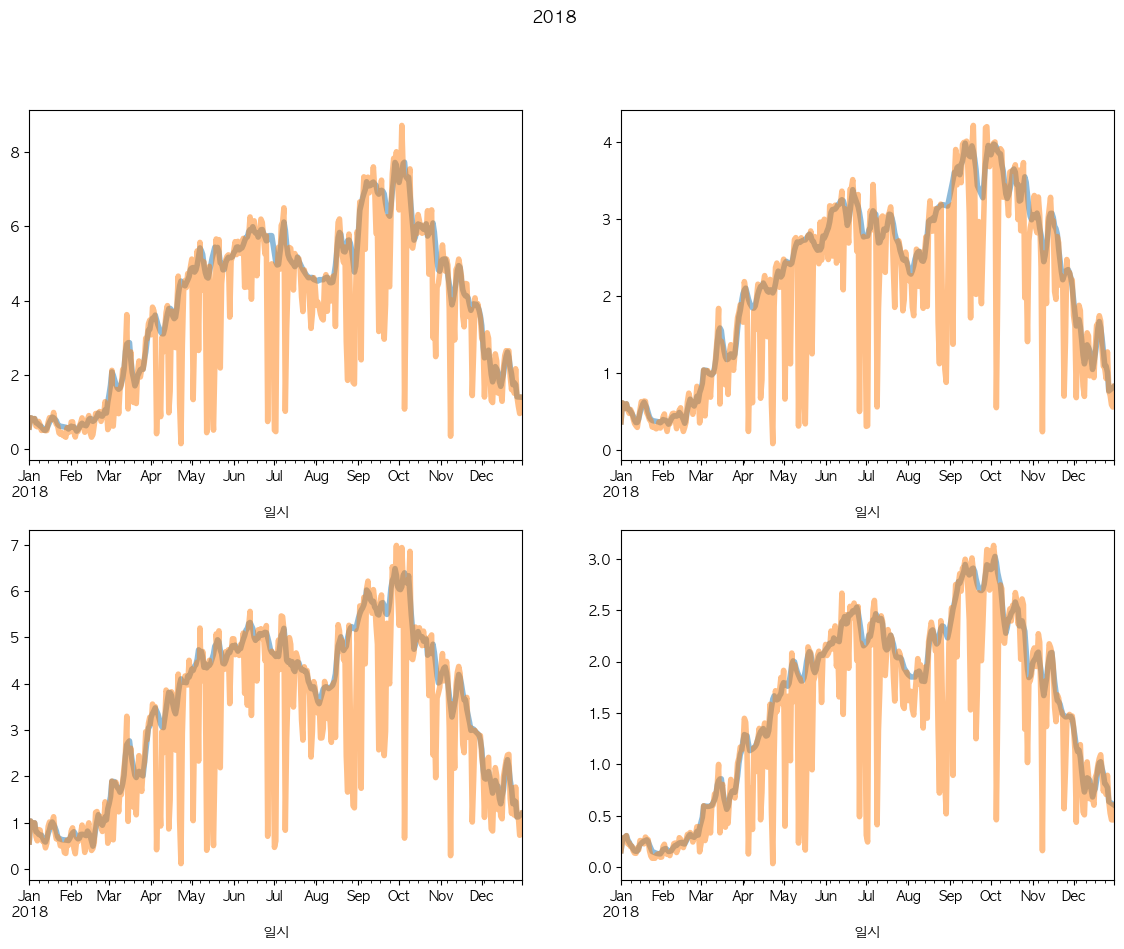

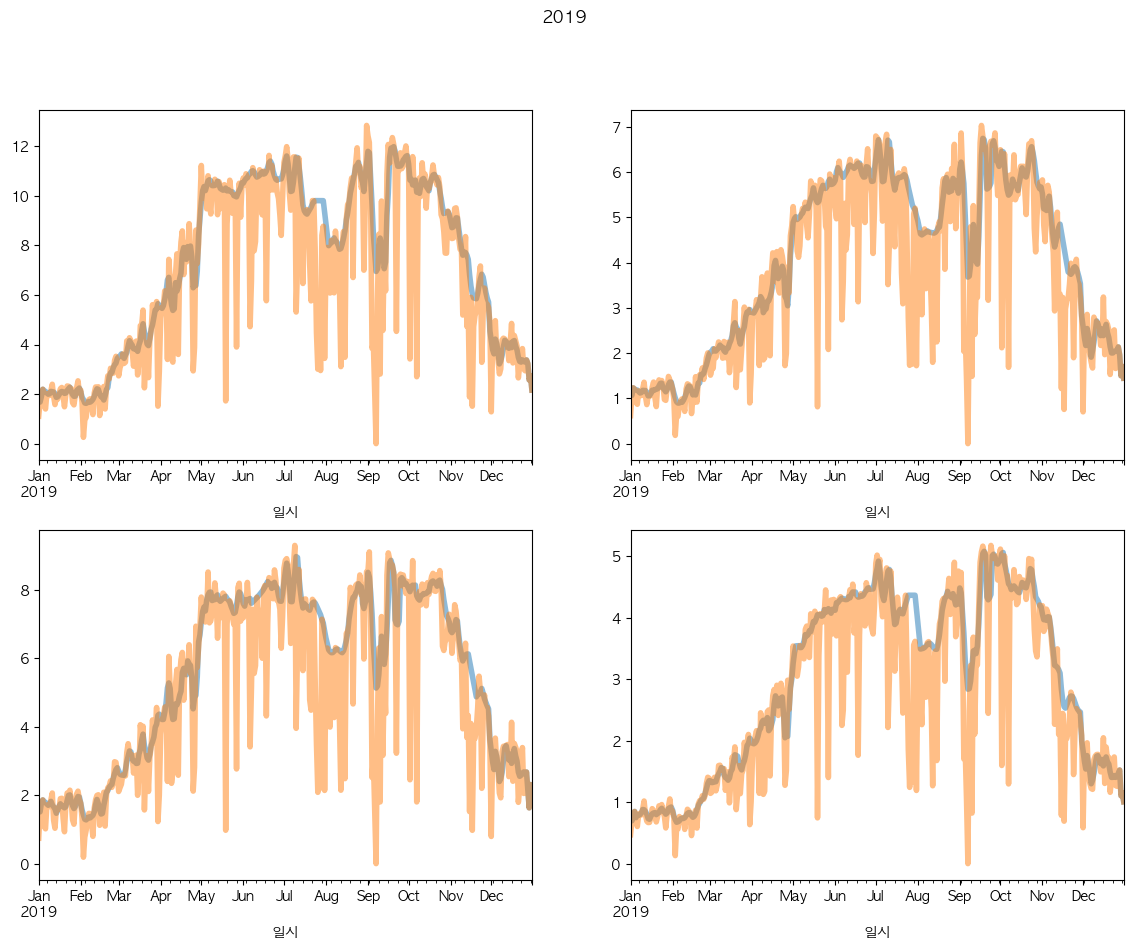

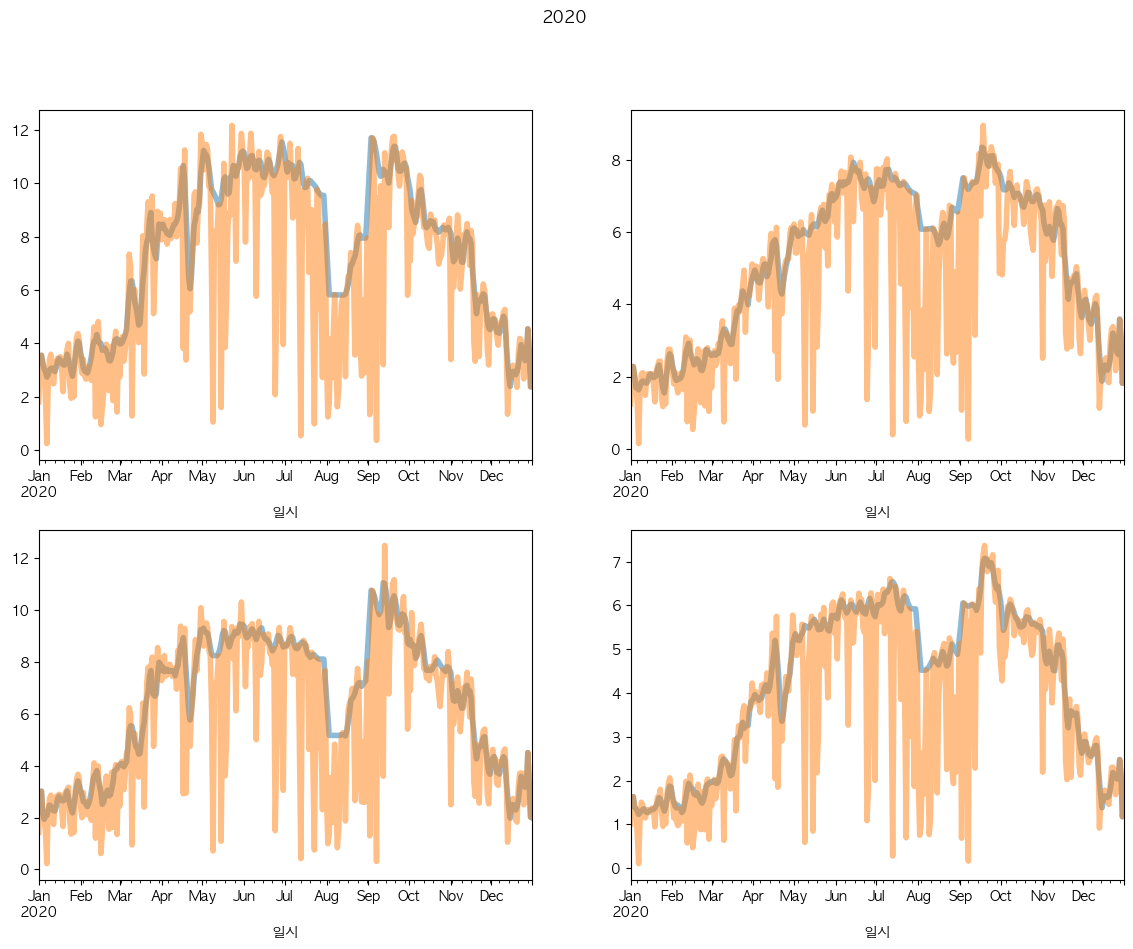

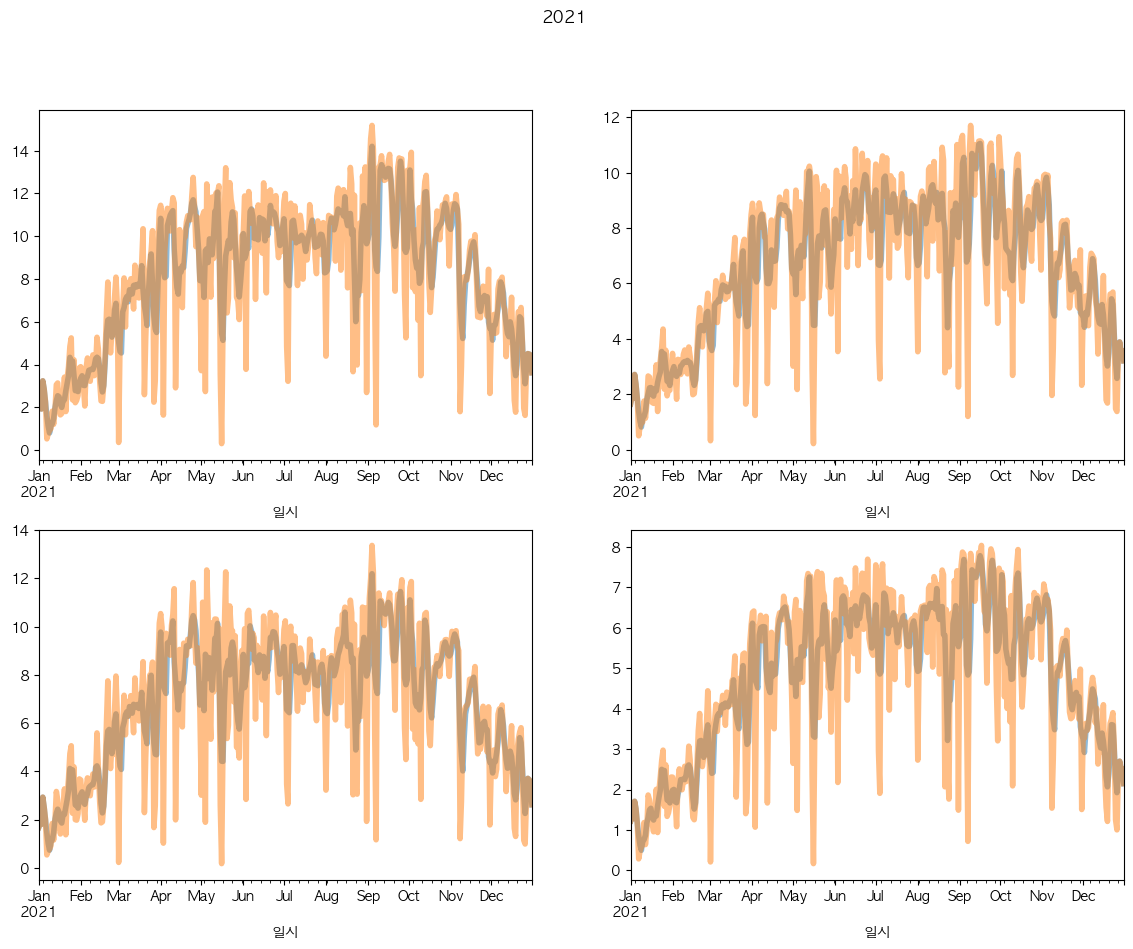

In [81]:
plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
df_2018.iloc[:,0].plot(alpha=0.5,lw=4)
df_2018_raw.iloc[:,0].plot(alpha=0.5,lw=4)
plt.subplot(2,2,2)
df_2018.iloc[:,1].plot(alpha=0.5,lw=4)
df_2018_raw.iloc[:,1].plot(alpha=0.5,lw=4)
plt.subplot(2,2,3)
df_2018.iloc[:,2].plot(alpha=0.5,lw=4)
df_2018_raw.iloc[:,2].plot(alpha=0.5,lw=4)
plt.subplot(2,2,4)
df_2018.iloc[:,3].plot(alpha=0.5,lw=4)
df_2018_raw.iloc[:,3].plot(alpha=0.5,lw=4)
plt.suptitle('2018')
plt.show()

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
df_2019.iloc[:,0].plot(alpha=0.5,lw=4)
df_2019_raw.iloc[:,0].plot(alpha=0.5,lw=4)
plt.subplot(2,2,2)
df_2019.iloc[:,1].plot(alpha=0.5,lw=4)
df_2019_raw.iloc[:,1].plot(alpha=0.5,lw=4)
plt.subplot(2,2,3)
df_2019.iloc[:,2].plot(alpha=0.5,lw=4)
df_2019_raw.iloc[:,2].plot(alpha=0.5,lw=4)
plt.subplot(2,2,4)
df_2019.iloc[:,3].plot(alpha=0.5,lw=4)
df_2019_raw.iloc[:,3].plot(alpha=0.5,lw=4)
plt.suptitle('2019')
plt.show()

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
df_2020.iloc[:,0].plot(alpha=0.5,lw=4)
df_2020_raw.iloc[:,0].plot(alpha=0.5,lw=4)
plt.subplot(2,2,2)
df_2020.iloc[:,1].plot(alpha=0.5,lw=4)
df_2020_raw.iloc[:,1].plot(alpha=0.5,lw=4)
plt.subplot(2,2,3)
df_2020.iloc[:,2].plot(alpha=0.5,lw=4)
df_2020_raw.iloc[:,2].plot(alpha=0.5,lw=4)
plt.subplot(2,2,4)
df_2020.iloc[:,3].plot(alpha=0.5,lw=4)
df_2020_raw.iloc[:,3].plot(alpha=0.5,lw=4)
plt.suptitle('2020')
plt.show()

plt.figure(figsize=(14,10))
plt.subplot(2,2,1)
df_2021.iloc[:,0].plot(alpha=0.5,lw=4)
df_2021_raw.iloc[:,0].plot(alpha=0.5,lw=4)
plt.subplot(2,2,2)
df_2021.iloc[:,1].plot(alpha=0.5,lw=4)
df_2021_raw.iloc[:,1].plot(alpha=0.5,lw=4)
plt.subplot(2,2,3)
df_2021.iloc[:,2].plot(alpha=0.5,lw=4)
df_2021_raw.iloc[:,2].plot(alpha=0.5,lw=4)
plt.subplot(2,2,4)
df_2021.iloc[:,3].plot(alpha=0.5,lw=4)
df_2021_raw.iloc[:,3].plot(alpha=0.5,lw=4)
plt.suptitle('2021')
plt.show()

In [82]:
train_data.drop('2020-02-29',inplace=True)

In [83]:
from sklearn.preprocessing import LabelEncoder
lbe = LabelEncoder()
train_data['주말평일'] = lbe.fit_transform(train_data['주말평일'])
sample_submission['주말평일'] = lbe.transform(sample_submission['주말평일'])

In [84]:
train_data=pd.concat([train_data[~(train_data['월']==12)].drop(['월','요일',
                                                            #    '일'
                                                               ]
                                                              ,axis=1),
                      pd.get_dummies(train_data[~(train_data['월']==12)]['월']),
                      pd.get_dummies(train_data[~(train_data['월']==12)]['요일']),
                    #   pd.get_dummies(train_data[~(train_data['월']==12)]['일'])
                      ]
                     ,axis=1)

sample_submission=pd.concat([sample_submission.drop(['월','요일',
                                                    #  '일'
                                                     ]
                                                    ,axis=1),
                      pd.get_dummies(sample_submission['월']),
                      pd.get_dummies(sample_submission['요일']),
                    #   pd.get_dummies(sample_submission['일'])
                      ],
                            axis=1)

In [85]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
train_data.iloc[:,4:] = mms.fit_transform(train_data.iloc[:,4:])
sample_submission.iloc[:,4:] = mms.transform(sample_submission.iloc[:,4:])

In [86]:
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor, VotingRegressor
from sklearn.kernel_ridge import KernelRidge

In [87]:
voting1=VotingRegressor(
    [['gbr',GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,loss='absolute_error',
                                              max_depth=4, max_features='auto',min_samples_leaf=15, min_samples_split=10,
                                              random_state =5
                                              )],
      ['rfr',RandomForestRegressor(n_estimators=1200,max_depth=15,min_samples_split=5,
                          min_samples_leaf=5,max_features=None,oob_score=True,
                          random_state=42)],
       ['krr',KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)]]
)
voting2=VotingRegressor(
    [['gbr',GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,loss='absolute_error',
                                              max_depth=4, max_features='auto',min_samples_leaf=15, min_samples_split=10,
                                              random_state =5
                                              )],
      ['rfr',RandomForestRegressor(n_estimators=1200,max_depth=15,min_samples_split=5,
                          min_samples_leaf=5,max_features=None,oob_score=True,
                          random_state=42)],
       ['krr',KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)]]
)
voting3=VotingRegressor(
    [['gbr',GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,loss='absolute_error',
                                              max_depth=4, max_features='auto',min_samples_leaf=15, min_samples_split=10,
                                              random_state =5
                                              )],
      ['rfr',RandomForestRegressor(n_estimators=1200,max_depth=15,min_samples_split=5,
                          min_samples_leaf=5,max_features=None,oob_score=True,
                          random_state=42)],
       ['krr',KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)]]
)
voting4=VotingRegressor(
    [['gbr',GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,loss='absolute_error',
                                              max_depth=4, max_features='auto',min_samples_leaf=15, min_samples_split=10,
                                              random_state =5
                                              )],
      ['rfr',RandomForestRegressor(n_estimators=1200,max_depth=15,min_samples_split=5,
                          min_samples_leaf=5,max_features=None,oob_score=True,
                          random_state=42)],
       ['krr',KernelRidge(alpha=0.6, kernel='polynomial', degree=2, coef0=2.5)]]
)

In [88]:
voting1.fit(train_data.iloc[:,4:],train_data.iloc[:,0])
voting2.fit(train_data.iloc[:,4:],train_data.iloc[:,1])
voting3.fit(train_data.iloc[:,4:],train_data.iloc[:,2])
voting4.fit(train_data.iloc[:,4:],train_data.iloc[:,3])

VotingRegressor(estimators=[['gbr',
                             GradientBoostingRegressor(learning_rate=0.05,
                                                       loss='absolute_error',
                                                       max_depth=4,
                                                       max_features='auto',
                                                       min_samples_leaf=15,
                                                       min_samples_split=10,
                                                       n_estimators=3000,
                                                       random_state=5)],
                            ['rfr',
                             RandomForestRegressor(max_depth=15,
                                                   max_features=None,
                                                   min_samples_leaf=5,
                                                   min_samples_split=5,
                                                   n_estimators=1200,
                                                   oob_score=True,
                                                   random_state=42)],
                            ['krr',
                             KernelRidge(alpha=0.6, coef0=2.5, degree=2,
                                         kernel='polynomial')]])

In [89]:
sample_submission.iloc[:,0]=voting1.predict(sample_submission.iloc[:,4:])
sample_submission.iloc[:,1]=voting2.predict(sample_submission.iloc[:,4:])
sample_submission.iloc[:,2]=voting3.predict(sample_submission.iloc[:,4:])
sample_submission.iloc[:,3]=voting4.predict(sample_submission.iloc[:,4:])

In [92]:
temp['월'] = temp.index.month
temp['일'] = temp.index.date

,광진구,동대문구,성동구,중랑구,일,년,주말평일,1,2,3,...,9,10,11,0,1,2,3,4,5,6
일시,,,,,,,,,,,,,,,,,,,,,
2022-01-01,2.949852,2.780488,2.639703,1.981171,0.000000,1.333333,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2022-01-02,2.855728,2.766920,2.559367,1.953709,0.033333,1.333333,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-01-03,2.742403,2.769455,2.556039,1.885156,0.066667,1.333333,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2022-01-04,3.022043,2.850877,2.802400,1.982700,0.100000,1.333333,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2022-01-05,3.033056,2.930077,2.798148,1.992913,0.133333,1.333333,1.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-26,7.902329,6.842388,6.553546,4.827515,0.833333,1.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2022-11-27,7.857123,6.778778,6.406056,4.800608,0.866667,1.333333,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2022-11-28,7.433853,6.489277,6.070579,4.629003,0.900000,1.333333,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [136]:
temp=sample_submission.copy()
temp['월'] = temp.index.month
temp['일'] = temp.index.day
temp['월_일'] = temp.index.strftime('%m_%d')

In [137]:
train_data_raw['월_일'] = train_data_raw['월'].apply(lambda x: str(x)+'_')+train_data_raw['일'].apply(lambda x: str(x))
# train_data_raw.drop('2020-02-29',inplace=True)

In [138]:
diff_df = list()
for i in train_data_raw['월_일'].unique():
    tmp=train_data_raw[train_data_raw['월_일'] == i].iloc[:,:4].diff()
    diff_mean=pd.DataFrame((tmp.iloc[1,:]*2 + tmp.iloc[2,:]*2 + tmp.iloc[3,:]*2)/5,
                           columns=[str(tmp.index[0]).split('-')[1] +'_'+ str(tmp.index[0]).split('-')[-1].split()[0]])
    diff_df.append(diff_mean)
# diff ratio
diff_df=pd.concat(diff_df,axis=1)

In [139]:
ans_sheet = list()
for col in diff_df.columns:
    ans_sheet.append(temp[temp['월_일']==col].iloc[:,:4] + diff_df[col])

In [159]:
ans = pd.concat(ans_sheet)

In [162]:
ans_raw = ans.copy()

In [171]:
ans.iloc[:,0]=((ans_raw.reset_index(drop=True).iloc[:,0] +df_2020.reset_index(drop=True).iloc[:334,0])/2).values
ans.iloc[:,1]=((ans_raw.reset_index(drop=True).iloc[:,1] +df_2020.reset_index(drop=True).iloc[:334,1])/2).values
ans.iloc[:,2]=((ans_raw.reset_index(drop=True).iloc[:,2] +df_2020.reset_index(drop=True).iloc[:334,2])/2).values
ans.iloc[:,3]=((ans_raw.reset_index(drop=True).iloc[:,3] +df_2020.reset_index(drop=True).iloc[:334,3])/2).values

<AxesSubplot: >

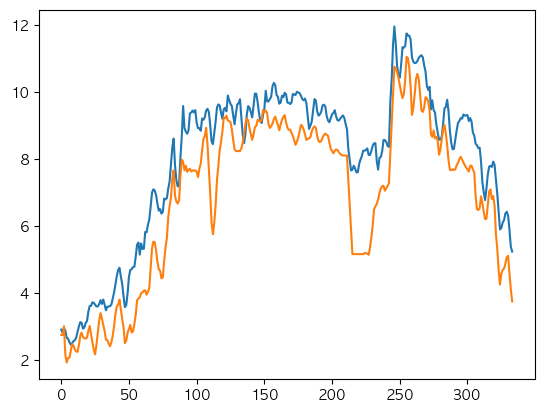

In [174]:
ans.reset_index(drop=True).iloc[:,2].plot()
df_2020.reset_index(drop=True).iloc[:334,2].plot()

In [175]:
ans_raw = ans.copy()

In [176]:
for col in ans.columns:
    ans[col][10:-10] = smooth(ans[col],5)[10:-10]

In [178]:
ans

,광진구,동대문구,성동구,중랑구
일시,,,,
2022-01-01,3.396526,2.681644,2.916051,1.913586
2022-01-02,3.298264,2.676860,2.814284,1.923854
2022-01-03,3.363201,2.779327,2.957619,1.957578
2022-01-04,3.634221,2.872239,2.888200,1.970950
2022-01-05,3.438728,2.665039,2.672474,1.920856
...,...,...,...,...
2022-11-26,7.545465,6.584594,6.436223,4.757008
2022-11-27,7.443678,6.510822,6.319095,4.718979
2022-11-28,7.046026,6.176639,5.895090,4.508226


In [181]:
sample_submission_raw.iloc[:,1:] = ans.values

In [183]:
sample_submission_raw.to_csv('my.csv',index=False)